In [1]:
import uproot4
#import coffea
%pylab inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import awkward1 as ak
from coffea import hist, processor
from coffea.nanoaod import NanoEvents

from dask.distributed import Client, progress
import distributed

from condor_utils import make_htcondor_cluster
import utils

import mplhep
plt.style.use(mplhep.style.ROOT)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Category is the loosest selection

In [3]:
def getSumWeights(file):
    import uproot4
    tree = uproot4.open(file)["Runs"]
    return sum(tree["genEventSumw"].array())

In [4]:
import glob
background_filesets = {}
signal_filesets = {}
data_filesets = {}
background_filesets[2016] = {
    "GJets40100":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-40To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_16_2____x3/*.root"),
    "GJets100200":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_16_2____x3/*.root"),
    "GJets200400":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_16_2____x3/*.root"),
    "GJets400600":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_16_2____x3/*.root"),
    "GJets600Inf":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-600ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_16_2____x3//*.root"),
    "DYJets":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_16____x3/*.root"),
    "ZGToLLG":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_17____x3/*.root"),
    "DiPhoton":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_17____x3/*.root"),
    "ZZ":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ZZ_TuneCUETP8M1_13TeV-pythia8_16_2____x3/*.root"),
    "HZ":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ggZH_HToGG_ZToLL_M125_13TeV_powheg_pythia8_17____x3/*.root")
}

signal_filesets[2016] = {
    "signal":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/HHggtautau____x3/*.root"),
}

data_filesets[2016] = {
    "DoubleEG":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2016*x3/*.root"),
}


In [5]:
background_filesets[2017] = {
        "GJets40100":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-40To100_TuneCP5_13TeV-madgraphMLM-pythia8_17____x3/*.root"),
    "GJets100200":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8_17____x3/*.root"),
    "GJets200400":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_17____x3/*.root"),
    "GJets400600":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8_17____x3/*.root"),
    "GJets600Inf":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-600ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_17____x3/*.root"),
    "DYJets":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8_17____x3/*.root"),
    "ZGToLLG":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_17____x3/*.root"),
    "DiPhoton":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_17____x3/*.root"),
    "ZZ":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ZZ_TuneCP5_13TeV-pythia8_17____x3/*.root"),
    "HZ":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ggZH_HToGG_ZToLL_M125_13TeV_powheg_pythia8_17____x3/*.root")
}    
    
signal_filesets[2017] = {
    "signal":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/HHggtautau____x3/*.root"),
}

data_filesets[2017] = {
    "DoubleEG":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2017*x3/*.root"),
}



In [6]:
background_filesets[2018] = {
        "GJets40100":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-40To100_TuneCP5_13TeV-madgraphMLM-pythia8_18____x3/*.root"),
    "GJets100200":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8_18____x3/*.root"),
    "GJets200400":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_18____x3/*.root"),
    "GJets400600":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8_18____x3/*.root"),
    "GJets600Inf":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/GJets_HT-600ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_18____x3/*.root"),
    "DYJets":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8_18____x3/*.root"),
    "ZGToLLG":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_18____x3/*.root"),
    "DiPhoton":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_18____x3/*.root"),
    "ZZ":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ZZ_TuneCP5_13TeV-pythia8_18____x3/*.root"),
    "HZ":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/ggZH_HToGG_ZToLL_M125_13TeV_powheg_pythia8_18____x3/*.root")
}    

signal_filesets[2018] = {
    "signal":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/HHggtautau____x3/*.root"),
}


data_filesets[2018] = {
    "DoubleEG":glob.glob("/hadoop/cms/store/user/legianni/ProjectMetis/EGamma_Run2018*x3/*.root"),
}

In [7]:
blacklist = [
"/hadoop/cms/store/user/legianni/ProjectMetis/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_16____x3/test_nanoaodSkim_33.root"
"/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2016B-2____x3/test_nanoaodSkim_43.root",
"/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2016D____x3/test_nanoaodSkim_10.root",
"/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2016E____x3/test_nanoaodSkim_14.root",
"/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2016D____x3/test_nanoaodSkim_17.root",
"/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2016H____x3/test_nanoaodSkim_20.root",
"/hadoop/cms/store/user/legianni/ProjectMetis/DoubleEG_Run2016H____x3/test_nanoaodSkim_32.root"
]



In [8]:
for filesets in [background_filesets, data_filesets]:
    for year in [2016]:
        for dataset,fileList in filesets[year].items():
            for blacklistFile in blacklist:
                try:
                    fileList.remove(blacklistFile)
                except:
                    continue
            #for file in fileList:
            #    try:
                 #   uproot4.open(file)
                
                #except OSError:
                #    print("{} is bad".format(file))
                #    fileList.remove(file)

In [10]:
#Dask stuff
cluster = make_htcondor_cluster(local=False, dashboard_address=13349)
cluster

In [12]:
cluster.scale(100)
c = Client(cluster)
c

In [13]:
import awkward
class BaseProcessorClass(processor.ProcessorABC):
    def __init__(self):
        self._accumulator = processor.dict_accumulator({
            "sumw": processor.defaultdict_accumulator(float),
            
            "diphoton_mass":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("diphoton_mass","Diphoton mass",500,0,500)),
            
            "leading_gamma_pt_normalized":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("category","$\tau$ category",np.arange(-1,8,1)),
            hist.Bin("leading_gamma_pt_normalized","$\gamma_1$~$P_T$/$m_{ \gamma\gamma}$",100,0,10)),
            
            "trailing_gamma_pt_normalized":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("category","$\tau$ category",np.arange(-1,8,1)),
            hist.Bin("trailing_gamma_pt_normalized","$\gamma_2$~$P_T$/$m_{ \gamma\gamma}$",100,0,10)), 
            
            "leading_gamma_eta":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("leading_gamma_eta","$\gamma_1$~$\eta$",500,-5,5)),
            
            "trailing_gamma_eta":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("trailing_gamma_eta","$\gamma_2$~$\eta$",500,-5,5)),
            
            "leading_pixel_seed_veto":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("leading_pixel_seed_veto","$\gamma_1$~pixel seed veto",2,0,2)),
            
            "trailing_pixel_seed_veto":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("trailing_pixel_seed_veto","$\gamma_2$~pixel seed veto",2,0,2)),
            
            "max_gamma_ID_MVA":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("max_gamma_ID_MVA","Max $\gamma$ ID MVA",200,-1,1)),
            
            "min_gamma_ID_MVA":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("min_gamma_ID_MVA","Min $\gamma$ ID MVA",200,-1,1)),
            
            "nJets":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("nJets","NJets",12,0,12)),
            
            "jet_1_pt":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("jet_1_pt","Jet 1 $P_T$",1000,0,1000)),
            
            "jet_1_eta":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("jet_1_eta","Jet 1 $\eta$",500,-2.5,2.5)),
            
            "jet_2_pt":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("jet_2_pt","Jet 2 $P_T$",1000,0,1000)),
            
            "jet_2_eta":hist.Hist(
            "Events",
            hist.Cat("dataset","Dataset"),
            hist.Bin("jet_2_eta","Jet 2 $\eta$",500,-2.5,2.5))
        }
            
        )
        self.sumw = sumw
    
    def fillHistograms(self, output, goodEvents, dataset, weightToFill):
        ggMass = goodEvents.ggMass
        
        #JaggedCandidateArray - one array for each object
        
        gHidx = awkward.JaggedArray.fromregular(goodEvents.gHidx)
        tauHidx = awkward.JaggedArray.fromregular(goodEvents.tauHidx)
        
        
        photons = goodEvents.Photon[gHidx]
        
        #output["sumw"][dataset] += events.genWeight.sum()
        #weightToFill = goodEvents.genWeight * xsecs[dataset] * 1000 * lumi
        
        output["diphoton_mass"].fill(
        dataset = dataset,
        diphoton_mass = ggMass,
        weight = weightToFill)
     

        output["leading_gamma_pt_normalized"].fill(
        dataset = dataset,
        category = goodEvents.Category.lveto,
        leading_gamma_pt_normalized = photons.pt[:,0]/ggMass, 
        weight = weightToFill)
        
        output["trailing_gamma_pt_normalized"].fill(
        dataset = dataset,
        category = goodEvents.Category.lveto,
        trailing_gamma_pt_normalized = photons.pt[:,1]/ggMass,
        weight = weightToFill)
        
        output["leading_gamma_eta"].fill(
        dataset = dataset,
        leading_gamma_eta = photons.eta[:,0],
        weight = weightToFill)
        
        output["trailing_gamma_eta"].fill(
        dataset = dataset,
        trailing_gamma_eta = photons.eta[:,1],
        weight = weightToFill)
        
        output["leading_pixel_seed_veto"].fill(
        dataset = dataset,
        leading_pixel_seed_veto = photons.pixelSeed[:,0],
        weight = weightToFill)
        
        output["trailing_pixel_seed_veto"].fill(
        dataset = dataset,
        trailing_pixel_seed_veto = photons.pixelSeed[:,1],
        weight = weightToFill)
        
        output["max_gamma_ID_MVA"].fill(
        dataset = dataset,
        max_gamma_ID_MVA = photons.mvaID.max(),
        weight = weightToFill)
        
        output["min_gamma_ID_MVA"].fill(
        dataset = dataset,
        min_gamma_ID_MVA = photons.mvaID.min(),
        weight = weightToFill)
        
        jets = goodEvents.Jet
        
        output["nJets"].fill(
        dataset = dataset,
        nJets = jets.counts,
        weight = weightToFill)
        
        output["jet_1_pt"].fill(
        dataset = dataset,
        jet_1_pt = jets[jets.counts >= 1].pt[:,0],
        weight = weightToFill[jets.counts >= 1] if weightToFill is not None else None)
        
        output["jet_1_eta"].fill(
        dataset = dataset,
        jet_1_eta = jets[jets.counts >= 1].eta[:,0],
        weight = weightToFill[jets.counts >= 1] if weightToFill is not None else None)
        
        output["jet_2_pt"].fill(
        dataset = dataset,
        jet_2_pt = jets[jets.counts >= 2].pt[:,1],
        weight = weightToFill[jets.counts >= 2] if weightToFill is not None else None)
        
        output["jet_2_eta"].fill(
        dataset = dataset,
        jet_2_eta = jets[jets.counts >= 2].eta[:,1],
        weight = weightToFill[jets.counts >= 2] if weightToFill is not None else None) 
        
        return output

In [14]:
class MyProcessor(BaseProcessorClass):
    
    def __init__(self, year, data = False, sumw = None):
        super().__init__()
        self.year = year
        self.data = data
        self.sumw = sumw
    
    
    @property
    def accumulator(self):
        return self._accumulator

    def process(self, events):
        xsecs = {
            "GJets40100":20790,
            "GJets100200":9238,
            "GJets200400":2305,
            "GJets400600":274.4,
            "GJets600Inf":93.46,
            "DYJets":6104,
            "ZGToLLG":117.864,
            "DiPhoton":88.36,
            "HZ":0.006185,
            "ZZ":10.16,
            "signal":0.029 * 0.0027 * 0.06 * 2,
        }
        lumis = {2016:35.9,2017:41.5,2018:59.8}
        lumi = lumis[self.year]
        output = self.accumulator.identity()
        dataset = events.metadata["dataset"]
        
        import os
        import psutil
        import time
        
        goodEvents = events[(events.ggMass >= 0)] #no tau selections!
        ggMass = goodEvents.ggMass
        
        
        gHidx = awkward.JaggedArray.fromregular(goodEvents.gHidx)
        tauHidx = awkward.JaggedArray.fromregular(goodEvents.tauHidx)

        if not self.data:
            output["sumw"][dataset] += events.genWeight.sum()
            weightToFill = goodEvents.genWeight * xsecs[dataset] * 1000 * lumi/self.sumw[dataset]
        else:
            weightToFill = None
        
        if "GJets" in dataset:
            dataset = "GJets"
        output = super().fillHistograms(output, goodEvents, dataset, weightToFill)
     
        return output

    def postprocess(self, accumulator):
        return accumulator

In [17]:
#sumw
from collections import defaultdict
sumw = defaultdict(dict)
for processClass,datasets in {"signal":signal_filesets, "background":background_filesets}.items():
    for year in [2016,2017,2018]:
        sumw[processClass][year] = {}
        
        for process,fileList in datasets[year].items():
            print("year = {}, processClass = {}, process = {}".format(year,processClass, process))
            weight = 0
            for file in fileList:
                weight += getSumWeights(file)
            sumw[processClass][year][process] = weight

year = 2016, processClass = signal, process = signal
year = 2017, processClass = signal, process = signal
year = 2018, processClass = signal, process = signal
year = 2016, processClass = background, process = GJets40100
year = 2016, processClass = background, process = GJets100200
year = 2016, processClass = background, process = GJets200400
year = 2016, processClass = background, process = GJets400600
year = 2016, processClass = background, process = GJets600Inf
year = 2016, processClass = background, process = DYJets
year = 2016, processClass = background, process = ZGToLLG
year = 2016, processClass = background, process = DiPhoton
year = 2016, processClass = background, process = ZZ
year = 2016, processClass = background, process = HZ
year = 2017, processClass = background, process = GJets40100
year = 2017, processClass = background, process = GJets100200
year = 2017, processClass = background, process = GJets200400
year = 2017, processClass = background, process = GJets400600
year 

In [18]:
background_hists = {}
signal_hists = {}
data_hists = {}
#c = None
for year in background_filesets.keys():
    background_hists[year] = processor.run_uproot_job(
    background_filesets[year],
    treename = "Events",
    processor_instance = MyProcessor(year = year,sumw = sumw["background"][year]),
    #executor = processor.futures_executor,
    executor = processor.dask_executor,
    executor_args={"nano":True, "client":c,"workers":8},
    )
    
    signal_hists[year] = processor.run_uproot_job(
    signal_filesets[year],
    treename = "Events",
    processor_instance = MyProcessor(year = year, sumw = sumw["signal"][year]),
    #executor = processor.futures_executor,
    executor = processor.dask_executor,
    executor_args={"nano":True, "client":c,"workers":8},
    )
    
    data_hists[year] = processor.run_uproot_job(
    data_filesets[year],
    treename = "Events",
    processor_instance = MyProcessor(year = year, data = True),
    #executor = processor.futures_executor,
    executor = processor.dask_executor,
    executor_args={"nano":True, "client":c, "workers":16},
    )

[####################################### ] | 99% Completed |  9min  9.6ss

distributed.utils - ERROR - '<' not supported between instances of 'NoneType' and 'tuple'
Traceback (most recent call last):
  File "/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/utils.py", line 655, in log_errors
    yield
  File "/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/dashboard/components/scheduler.py", line 2077, in graph_doc
    graph = TaskGraph(scheduler, sizing_mode="stretch_both")
  File "/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/dashboard/components/scheduler.py", line 1412, in __init__
    self.layout = GraphLayout(scheduler)
  File "/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/diagnostics/graph_layout.py", line 42, in __init__
    priority=priority,
  File "/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/diagnostics/graph_layout.py", line 48, in update_g

[####################################### ] | 99% Completed |  9min  9.8s

Exception ignored in: <function TaskGraph.__del__ at 0x7f4e8dfcb950>
Traceback (most recent call last):
  File "/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/dashboard/components/scheduler.py", line 1582, in __del__
    self.scheduler.remove_plugin(self.layout)
AttributeError: 'TaskGraph' object has no attribute 'layout'


In [19]:
background_hists_final = {}
for histName, hist in background_hists[2016].items():
    if histName == "sumw":
        continue
    background_hists_final[histName] = hist.copy()
    background_hists_final[histName].add(background_hists[2017][histName])
    background_hists_final[histName].add(background_hists[2018][histName])

In [20]:
signal_hists_final = {}
for histName, hist in signal_hists[2016].items():
    if histName == "sumw":
        continue
    signal_hists_final[histName] = hist.copy()
    signal_hists_final[histName].add(signal_hists[2017][histName])
    signal_hists_final[histName].add(signal_hists[2018][histName])

In [21]:
data_hists_final = {}
for histName, hist in data_hists[2016].items():
    if histName == "sumw":
        continue
    data_hists_final[histName] = hist.copy()
    data_hists_final[histName].add(data_hists[2017][histName])
    data_hists_final[histName].add(data_hists[2018][histName])

In [22]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label': 'Stat. Unc.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,}

line_opts={'linewidth':3, "color":"black"}

In [48]:

order

['GJets', 'DYJets', 'DiPhoton', 'ZGToLLG', 'ZZ', 'HZ']

/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


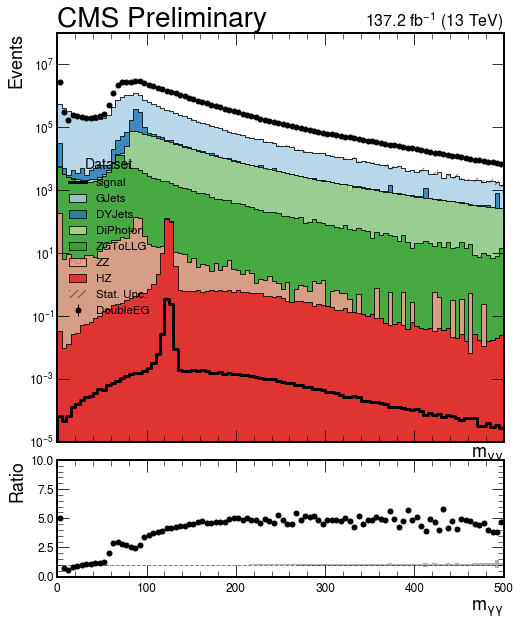

In [55]:
import coffea.hist as hist

order = [k[0] for k,v in sorted(background_hists_final["diphoton_mass"].project("dataset").values().items(), key = lambda x : x[1])]

fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8,10),
    gridspec_kw={"height_ratios": (3.5, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)
ax.set_yscale('log')
ax.set_ylim([1e-5, 1e8])
from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))

rebin = hist.Bin("diphoton_mass","$m_{\gamma\gamma}$",100,0,500)
new_hist = background_hists_final["diphoton_mass"].rebin("diphoton_mass",rebin)


hist.plot1d(
    new_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    stack=True,
    line_opts=None,
    order = order,
    fill_opts=fill_opts,
    error_opts=error_opts
)

new_sig_hist = signal_hists_final["diphoton_mass"].rebin("diphoton_mass",rebin)
hist.plot1d(
    new_sig_hist, overlay = "dataset", 
    line_opts=line_opts, 
    clear = False,
    ax = ax,
)

new_data_hist = data_hists_final["diphoton_mass"].rebin("diphoton_mass",rebin)
hist.plot1d(
    new_data_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    error_opts=data_err_opts
)

hist.plotratio(
    num= new_data_hist.integrate("dataset"),
    denom= new_hist.integrate("dataset"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Ratio')
rax.set_ylim(0,10)

# add some labels
coffee = plt.text(0., 1., r"CMS Preliminary",
                  fontsize=28,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"137.2 fb$^{-1}$ (13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
plt.savefig("all_years_mgg.pdf")
plt.savefig("all_years_mgg.png")

/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-p

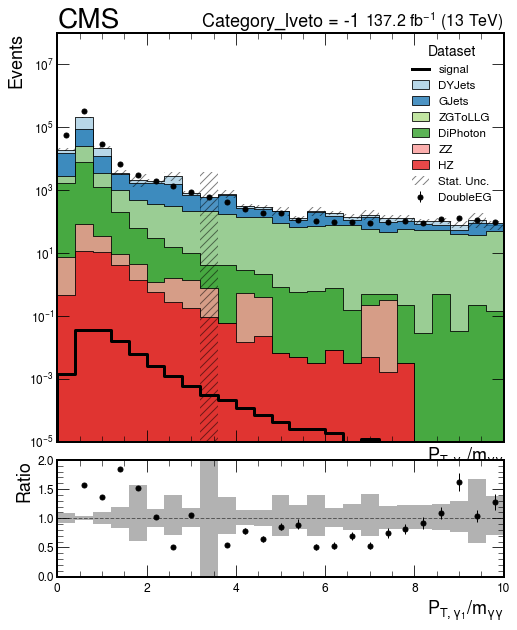

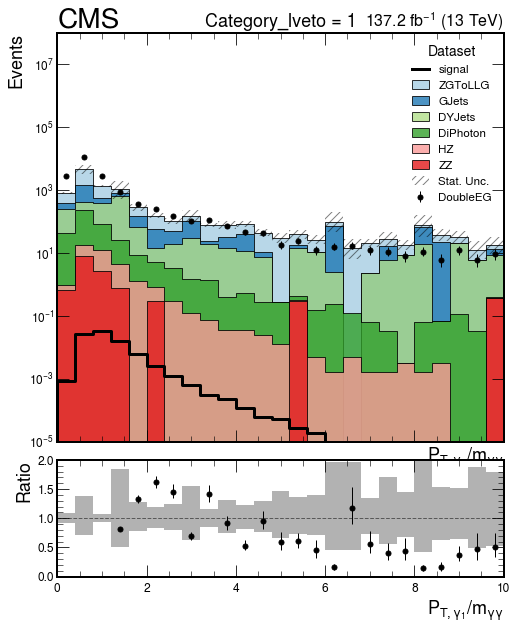

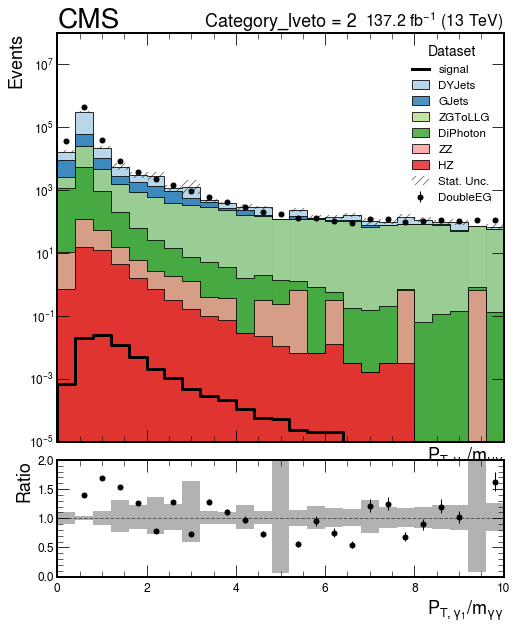

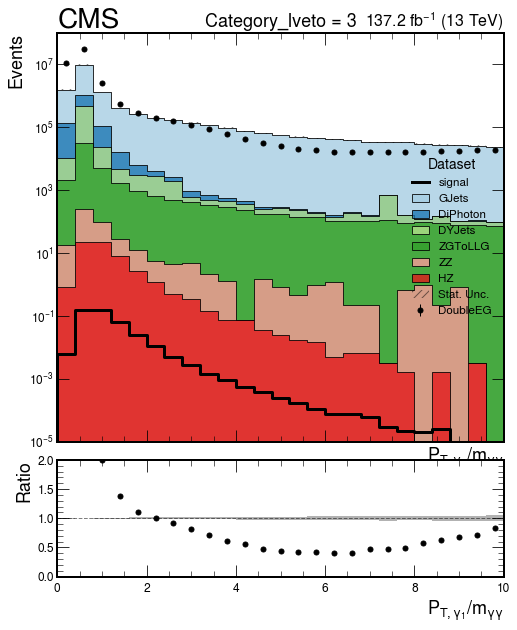

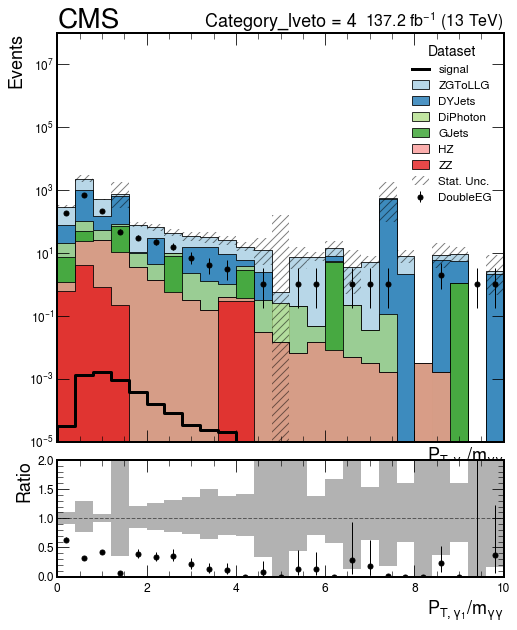

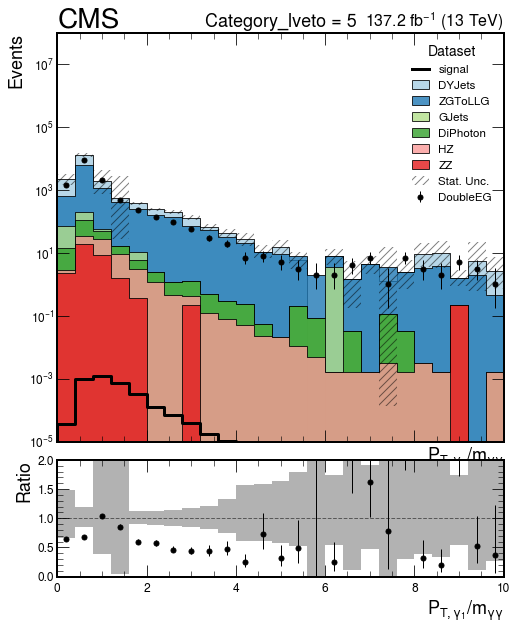

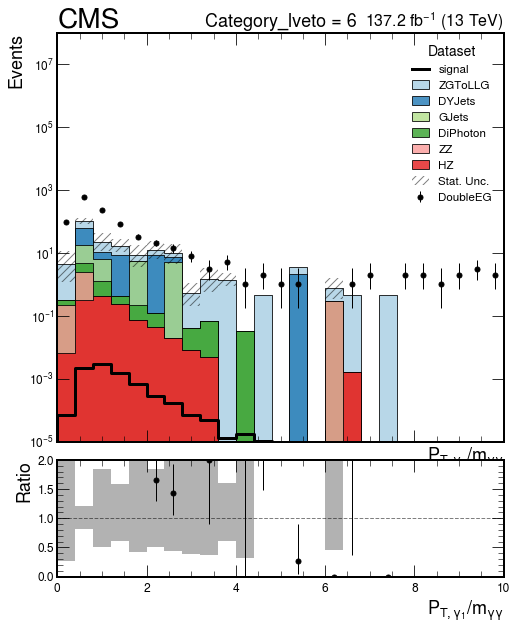

In [58]:
rebin = hist.Bin("leading_gamma_pt_normalized","$P_{T,\gamma_1}/m_{\gamma\gamma}$",25,0,10)
new_hist = background_hists_final["leading_gamma_pt_normalized"].rebin("leading_gamma_pt_normalized",rebin)
new_sig_hist = signal_hists_final["leading_gamma_pt_normalized"].rebin("leading_gamma_pt_normalized",rebin)
new_data_hist = data_hists_final["leading_gamma_pt_normalized"].rebin("leading_gamma_pt_normalized",rebin)


for category in [-1,1,2,3,4,5,6]:

    #ax = None, rax = None
    fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8,10),
    gridspec_kw={"height_ratios": (3.5, 1)},
    sharex=True
)
    fig.subplots_adjust(hspace=.07)
    ax.set_yscale("log")
    ax.set_ylim([1e-5, 1e8])
    
    from cycler import cycler
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
    ax.set_prop_cycle(cycler(color=colors))

    order = [k[0] for k,v in sorted(new_hist[:,category:category+1,:].project("dataset").values().items(), key = lambda x : x[1])]
    hist.plot1d(
        new_hist[:,category:category+1,:].integrate("category"),
        overlay="dataset",
        clear = False,
        stack=True,
        ax = ax,
        line_opts=None,
        fill_opts=fill_opts,
        order = order,
        error_opts=error_opts
    )

    
    hist.plot1d(
        new_sig_hist[:,category:category+1,:].integrate("category"), 
        overlay = "dataset", 
        line_opts=line_opts, 
        clear = False,
        ax = ax,
        )
    
    hist.plot1d(
    new_data_hist[:,category:category+1,:].integrate("category"),
    overlay="dataset",
    ax=ax,
    clear=False,
    error_opts=data_err_opts
    )

    hist.plotratio(
        num= (new_data_hist[:,category:category+1,:].integrate("category")).integrate("dataset"),
        denom= (new_hist[:,category:category+1,:].integrate("category")).integrate("dataset"),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num'
    )
    rax.set_ylabel('Ratio')
    rax.set_ylim(0,2)

    # add some labels
    coffee = plt.text(0., 1., r"CMS",
                  fontsize=28,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    lumi = plt.text(1., 1., r"137.2 fb$^{-1}$ (13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
    ax.set_title("Category_lveto = {}".format(category))
    plt.savefig("all_years_leading_gamma_pt_normalized_category_{}.pdf".format(category))
    plt.savefig("all_years_leading_gamma_pt_normalized_category_{}.png".format(category))

/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-packages/coffea/hist/plot.py:280: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/home/users/bsathian/miniconda3/envs/analysisenv/lib/python3.7/site-p

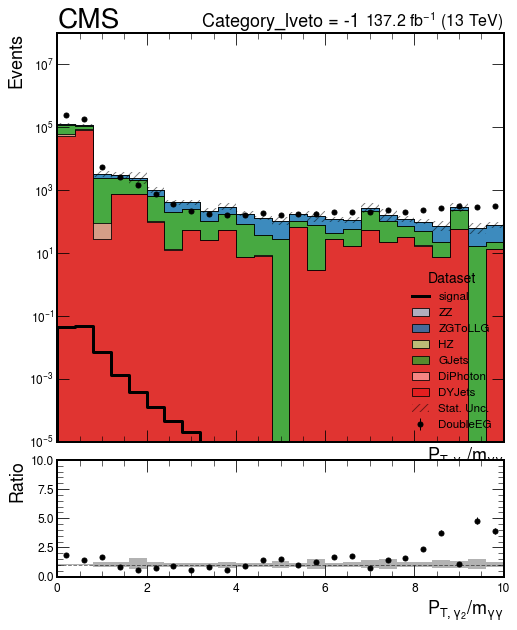

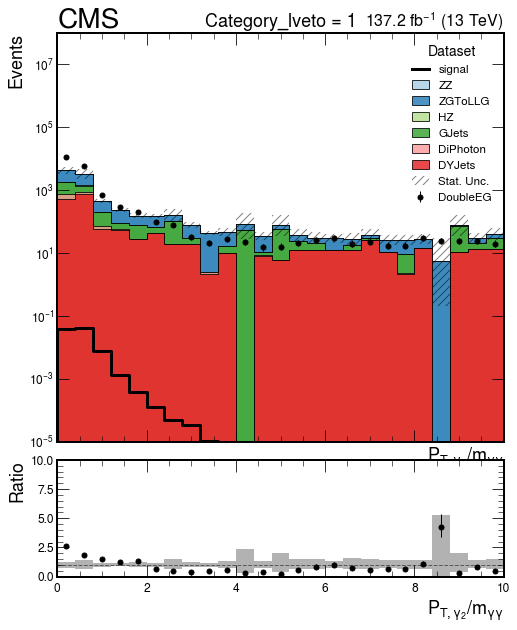

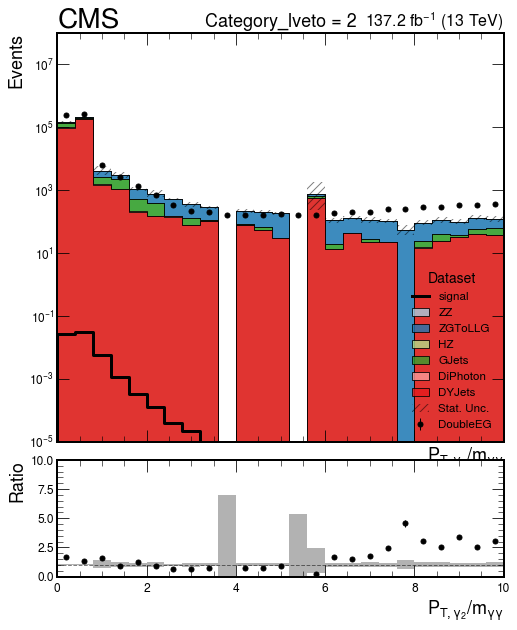

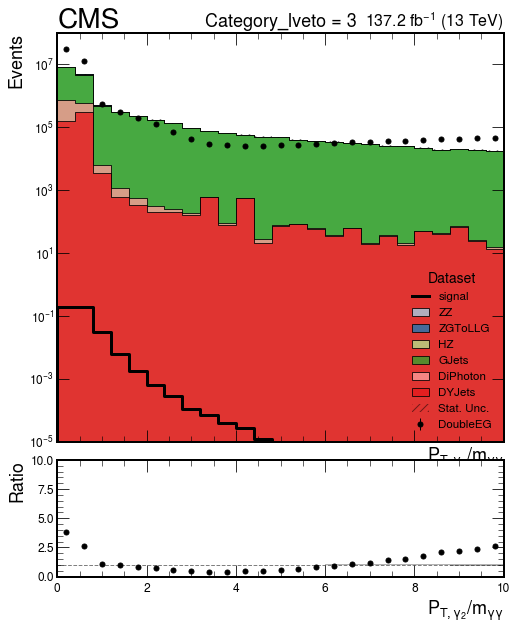

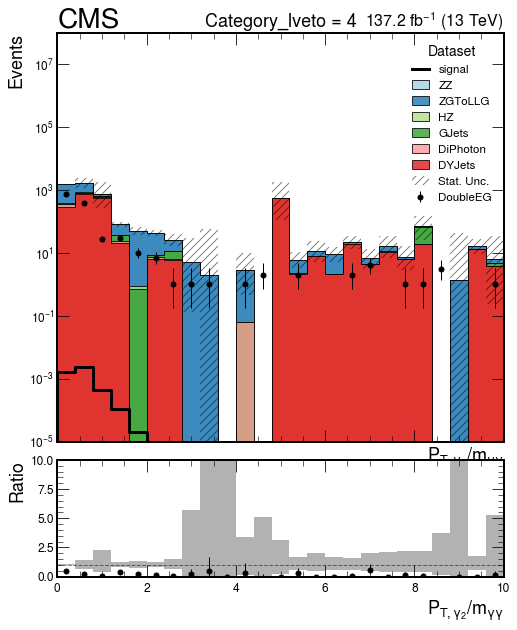

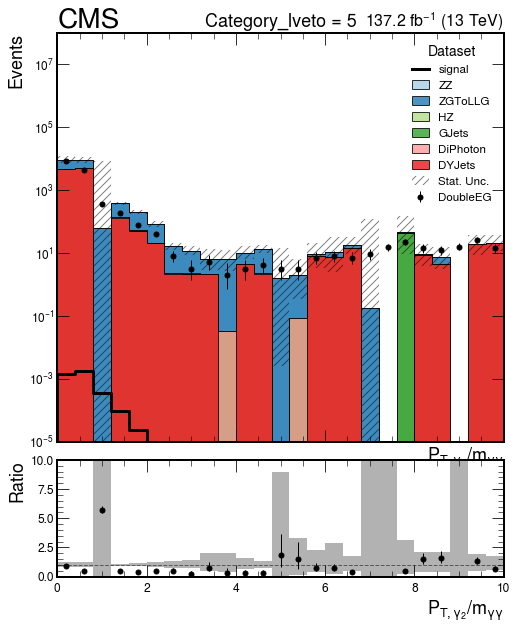

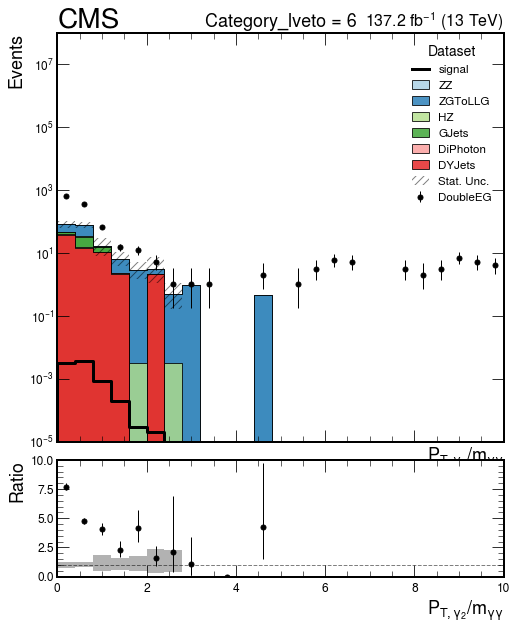

In [59]:
rebin = hist.Bin("trailing_gamma_pt_normalized","$P_{T,\gamma_2}/m_{\gamma\gamma}$",25,0,10)
new_hist = background_hists_final["trailing_gamma_pt_normalized"].rebin("trailing_gamma_pt_normalized",rebin)
new_sig_hist = signal_hists_final["trailing_gamma_pt_normalized"].rebin("trailing_gamma_pt_normalized",rebin)
new_data_hist = data_hists_final["trailing_gamma_pt_normalized"].rebin("trailing_gamma_pt_normalized",rebin)

for category in [-1,1,2,3,4,5,6]:

    #ax = None, rax = None
    fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8,10),
    gridspec_kw={"height_ratios": (3.5, 1)},
    sharex=True
)
    fig.subplots_adjust(hspace=.07)
    ax.set_yscale("log")
    ax.set_ylim([1e-5, 1e8])
    
    from cycler import cycler
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
    ax.set_prop_cycle(cycler(color=colors))

    order = [k[0] for k,v in sorted(new_hist[:,category:category+1,:].project("dataset").values().items(), key = lambda x : x[1])]
    hist.plot1d(
        new_hist[:,category:category+1,:].integrate("category"),
        overlay="dataset",
        clear = False,
        stack=True,
        ax = ax,
        line_opts=None,
        fill_opts=fill_opts,
        error_opts=error_opts
    )

    
    hist.plot1d(
        new_sig_hist[:,category:category+1,:].integrate("category"), 
        overlay = "dataset", 
        line_opts=line_opts, 
        clear = False,
        ax = ax,
        )
    
    hist.plot1d(
    new_data_hist[:,category:category+1,:].integrate("category"),
    overlay="dataset",
    ax=ax,
    clear=False,
    error_opts=data_err_opts
    )

    hist.plotratio(
        num= (new_data_hist[:,category:category+1,:].integrate("category")).integrate("dataset"),
        denom= (new_hist[:,category:category+1,:].integrate("category")).integrate("dataset"),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num'
    )
    rax.set_ylabel('Ratio')
    rax.set_ylim(0,10)

    # add some labels
    coffee = plt.text(0., 1., r"CMS",
                  fontsize=28,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    lumi = plt.text(1., 1., r"137.2 fb$^{-1}$ (13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
    ax.set_title("Category_lveto = {}".format(category))
    plt.savefig("all_years_trailing_gamma_pt_normalized_category_{}.pdf".format(category))
    plt.savefig("all_years_trailing_gamma_pt_normalized_category_{}.png".format(category))

## Redundant stuff

In [ ]:
class TauProcessor(BaseProcessorClass):
    
    def __init__(self, year, data = False, sumw = None):
        super().__init__()
        self.year = year
        self.data = data
        self.sumw = sumw
    
    
    @property
    def accumulator(self):
        return self._accumulator

    def process(self, events):
        xsecs = {
            "GJets40100":20790,
            "GJets100200":9238,
            "GJets200400":2305,
            "GJets400600":274.4,
            "GJets600Inf":93.46,
            "DYJets":6104,
            "ZGToLLG":117.864,
            "DiPhoton":88.36,
            "signal":0.029 * 0.0027 * 0.06 * 2,
        }
        lumis = {2016:35.9,2017:41.5,2018:59.8}
        lumi = lumis[self.year]
        output = self.accumulator.identity()
        dataset = events.metadata["dataset"]
        
        import os
        import psutil
        import time
        
        goodEvents = events[(events.ggMass >= 0) & (events.Category >= 1)] #all tau selections!
        ggMass = goodEvents.ggMass
        
        
        gHidx = awkward.JaggedArray.fromregular(goodEvents.gHidx)
        tauHidx = awkward.JaggedArray.fromregular(goodEvents.tauHidx)

        if not self.data:
            output["sumw"][dataset] += events.genWeight.sum()
            weightToFill = goodEvents.genWeight * xsecs[dataset] * 1000 * lumi/self.sumw[dataset]
        else:
            weightToFill = None
        
        if "GJets" in dataset:
            dataset = "GJets"
        output = super().fillHistograms(output, goodEvents, dataset, weightToFill)
        #output = super().fillTauHistograms(output, goodEvents, dataset,weightToFill)
        return output

    def postprocess(self, accumulator):
        return accumulator

In [ ]:
alltau_background_hists = {}
alltau_signal_hists = {}
alltau_data_hists = {}

for year in background_filesets.keys():
    alltau_background_hists[year] = processor.run_uproot_job(
    background_filesets[year],
    treename = "Events",
    processor_instance = TauProcessor(year = year,sumw = sumw["background"][year]),
    #executor = processor.futures_executor,
    executor = processor.dask_executor,
    executor_args={"nano":True, "client":c,"workers":8},)
    
    alltau_signal_hists[year] = processor.run_uproot_job(
    signal_filesets[year],
    treename = "Events",
    processor_instance = TauProcessor(year = year, sumw = sumw["signal"][year]),
    #executor = processor.futures_executor,
    executor = processor.dask_executor,
    executor_args={"nano":True, "client":c,"workers":8},)
    
    alltau_data_hists[year] = processor.run_uproot_job(
    data_filesets[year],
    treename = "Events",
    processor_instance = TauProcessor(year = year, data = True),
    #executor = process.futures_executor
    executor = processor.dask_executor,
    executor_args={"nano":True, "client":c, "workers":16},)

In [ ]:
alltau_background_hists_final = {}
for histName, hist in alltau_background_hists[2016].items():
    if histName == "sumw":
        continue
    alltau_background_hists_final[histName] = hist.copy()
    alltau_background_hists_final[histName].add(alltau_background_hists[2017][histName])
    alltau_background_hists_final[histName].add(alltau_background_hists[2018][histName])

In [ ]:
alltau_signal_hists_final = {}
for histName, hist in alltau_signal_hists[2016].items():
    if histName == "sumw":
        continue
    alltau_signal_hists_final[histName] = hist.copy()
    alltau_signal_hists_final[histName].add(alltau_signal_hists[2017][histName])
    alltau_signal_hists_final[histName].add(alltau_signal_hists[2018][histName])

In [ ]:
alltau_data_hists_final = {}
for histName, hist in alltau_data_hists[2016].items():
    if histName == "sumw":
        continue
    alltau_data_hists_final[histName] = hist.copy()
    alltau_data_hists_final[histName].add(alltau_data_hists[2017][histName])
    alltau_data_hists_final[histName].add(alltau_data_hists[2018][histName])

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label': 'Stat. Unc.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,}

line_opts={'linewidth':3, "color":"black"}

In [ ]:
import coffea.hist as hist

fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8,10),
    gridspec_kw={"height_ratios": (3.5, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)
ax.set_yscale('log')
ax.set_ylim([1e-5, 1e8])
from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))

rebin = hist.Bin("diphoton_mass","$m_{\gamma\gamma}$",100,0,500)
new_hist = alltau_background_hists_final["diphoton_mass"].rebin("diphoton_mass",rebin)


hist.plot1d(
    new_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    stack=True,
    line_opts=None,
    fill_opts=fill_opts,
    error_opts=error_opts
)

new_sig_hist = alltau_signal_hists_final["diphoton_mass"].rebin("diphoton_mass",rebin)
hist.plot1d(
    new_sig_hist, overlay = "dataset", 
    line_opts=line_opts, 
    clear = False,
    ax = ax,
)

new_data_hist = alltau_data_hists_final["diphoton_mass"].rebin("diphoton_mass",rebin)
hist.plot1d(
    new_data_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    error_opts=data_err_opts
)

hist.plotratio(
    num= new_data_hist.integrate("dataset"),
    denom= new_hist.integrate("dataset"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Ratio')
rax.set_ylim(0,2)

# add some labels
coffee = plt.text(0., 1., r"CMS Preliminary",
                  fontsize=28,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"137.2 fb$^{-1}$ (13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
plt.savefig("all_years_alltau_mgg.pdf")
plt.savefig("all_years_alltau_mgg.png")

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8,10),
    gridspec_kw={"height_ratios": (3.5, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)
ax.set_yscale('log')
ax.set_ylim([1e-7, 1e8])
from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))

rebin = hist.Bin("diphoton_mass","$P_{T,\gamma_1}/m_{\gamma\gamma}$",25,0,10)
new_hist = alltau_background_hists_final["leading_gamma_pt_normalized"].rebin("leading_gamma_pt_normalized",rebin)


hist.plot1d(
    new_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    stack=True,
    line_opts=None,
    fill_opts=fill_opts,
    error_opts=error_opts
)

new_sig_hist = alltau_signal_hists_final["leading_gamma_pt_normalized"].rebin("leading_gamma_pt_normalized",rebin)
hist.plot1d(
    new_sig_hist, overlay = "dataset", 
    line_opts=line_opts, 
    clear = False,
    ax = ax,
)

new_data_hist = alltau_data_hists_final["leading_gamma_pt_normalized"].rebin("leading_gamma_pt_normalized",rebin)
hist.plot1d(
    new_data_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    error_opts=data_err_opts
)

hist.plotratio(
    num= new_data_hist.integrate("dataset"),
    denom= new_hist.integrate("dataset"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Ratio')
rax.set_ylim(0,2)

# add some labels
coffee = plt.text(0., 1., r"CMS Preliminary",
                  fontsize=28,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"137.2 fb$^{-1}$ (13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
plt.savefig("all_years_alltau_leading_gamma_pt_normalized.pdf")
plt.savefig("all_years_alltau_leading_gamma_pt_normalized.png")

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8,10),
    gridspec_kw={"height_ratios": (3.5, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)
ax.set_yscale('log')
ax.set_ylim([1e-7, 1e8])
from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))

rebin = hist.Bin("diphoton_mass","$P_{T,\gamma_2}/m_{\gamma\gamma}$",25,0,10)
new_hist = alltau_background_hists_final["trailing_gamma_pt_normalized"].rebin("trailing_gamma_pt_normalized",rebin)


hist.plot1d(
    new_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    stack=True,
    line_opts=None,
    fill_opts=fill_opts,
    error_opts=error_opts
)

new_sig_hist = alltau_signal_hists_final["trailing_gamma_pt_normalized"].rebin("trailing_gamma_pt_normalized",rebin)
hist.plot1d(
    new_sig_hist, overlay = "dataset", 
    line_opts=line_opts, 
    clear = False,
    ax = ax,
)

new_data_hist = alltau_data_hists_final["trailing_gamma_pt_normalized"].rebin("trailing_gamma_pt_normalized",rebin)
hist.plot1d(
    new_data_hist,
    overlay="dataset",
    ax=ax,
    clear=False,
    error_opts=data_err_opts
)

hist.plotratio(
    num= new_data_hist.integrate("dataset"),
    denom= new_hist.integrate("dataset"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Ratio')
rax.set_ylim(0,2)

# add some labels
coffee = plt.text(0., 1., r"CMS Preliminary",
                  fontsize=28,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"137.2 fb$^{-1}$ (13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
plt.savefig("all_years_alltau_trailing_gamma_pt_normalized.pdf")
plt.savefig("all_years_alltau_trailing_gamma_pt_normalized.png")